## Experience Analytics
### analyzing user experience based on network parameters and device characteristics

In [1]:
# Add the parent directory to the system path 
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

In [2]:
# import script module 
from scripts.experience_analytics import *

In [3]:
# Load the data
df = pd.read_csv('../data/cleaned_telecom_data.csv')

In [4]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,244912.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,244912.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,244912.0,2.082008e+14,3.373456e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,244912.0,2.082014e+14,3.373456e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,244912.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 150001 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150001 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150001 non-null  float64
 5   Dur. (ms)                                 150001 non-null  float64
 6   IMSI                                      150001 non-null  float64
 7   MSISDN/Number                             150001 non-null  float64
 8   IMEI                                      150001 non-null  float64
 9   Last Location Name                        150001 non-null  object 
 10  Avg RTT DL (ms)     

In [6]:
df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.500010e+05,150001.000000,150001.000000,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,150001.000000,150001.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05
mean,1.013887e+19,499.188200,498.800880,99572.128983,2.082015e+14,3.366999e+10,4.847455e+13,72.862020,12.037797,11112.355328,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112120e+07,4.546434e+08
std,2.883600e+18,288.610872,288.096693,59084.184127,3.925668e+08,3.532589e+07,2.237359e+13,51.361714,11.040917,17189.349903,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.126923e+07,2.441421e+08
min,6.917538e+18,0.000000,0.000000,7142.000000,2.082008e+14,3.360168e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,9.503716e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,57442.000000,2.082014e+14,3.365151e+10,3.546261e+13,35.000000,3.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322203e+07,2.431072e+08
50%,7.349883e+18,499.000000,500.000000,86399.000000,2.082015e+14,3.366380e+10,3.572241e+13,54.000000,7.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114324e+07,4.558409e+08
75%,1.304243e+19,749.000000,750.000000,132430.000000,2.082018e+14,3.368473e+10,8.611970e+13,109.795706,17.662883,19710.000000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657051e+08
max,1.318654e+19,999.000000,999.000000,244912.000000,2.082023e+14,3.373456e+10,9.900120e+13,221.989265,39.657207,49210.500000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.275255e+07,9.029696e+08


In [7]:
print(df.isnull().sum())

Bearer Id                                   0
Start                                       1
Start ms                                    0
End                                         1
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

### Aggregate customer data

In [8]:
# Task 3.1: Aggregate customer data
aggregated_data = aggregate_customer_data(df)
print("Aggregated data sample:")
aggregated_data.head()

Aggregated data sample:


,Avg TCP Retrans DL,Avg TCP Retrans UL,Avg RTT DL,Avg RTT UL,Handset Type,Avg Throughput DL,Avg Throughput UL,Avg TCP Retrans,Avg RTT,Avg Throughput
MSISDN/Number,,,,,,,,,,
3.360168e+10,1.493360e+07,575766.310927,66.991436,8.645259,Apple iPhone 7 (A1778),9263.906685,532.103064,7.754682e+06,37.818348,4898.004875
3.360171e+10,2.042108e+07,750467.119262,110.000000,5.000000,Apple iPhone Se (A1723),23.000000,47.000000,1.058577e+07,57.500000,35.000000
3.360171e+10,5.751940e+05,44040.000000,145.000000,7.000000,Apple iPhone 6 (A1586),7677.000000,2115.000000,3.096170e+05,76.000000,4896.000000
3.360171e+10,1.778695e+07,437307.059631,104.397853,18.831441,Samsung Galaxy S8 Plus (Sm-G955F),24626.750000,676.500000,9.112128e+06,61.614647,12651.625000
3.360171e+10,2.042108e+07,750467.119262,29.000000,5.000000,Apple iPhone 7 Plus (A1784),63.000000,54.000000,1.058577e+07,17.000000,58.500000


Compute & list 10 of the top, bottom, and most frequent:
  - TCP values in the dataset.
  - RTT values in the dataset.
  - Throughput values in the dataset.

In [9]:
# Task 3.2: Compute and list top, bottom, and most frequent values
for column in ['Avg TCP Retrans', 'Avg RTT', 'Avg Throughput']:
    top, bottom, frequent = get_top_bottom_frequent(aggregated_data, column)
    print(f"\n{column}:")
    print(f"Top 10: {top}")
    print(f"Bottom 10: {bottom}")
    print(f"Most Frequent 10: {frequent}")


Avg TCP Retrans:
Top 10: [25417474.42429954, 25417474.42429954, 25417474.42429954, 25417474.42429954, 25417474.42429954, 25417474.42429954, 25417474.42429954, 25417474.42429954, 25417474.42429954, 25417474.42429954]
Bottom 10: [48.5, 64.0, 67.0, 71.5, 88.0, 89.5, 91.0, 94.5, 104.0, 105.5]
Most Frequent 10: [10585772.069719816, 10185488.963347198, 25417474.42429954, 9789345.694853878, 10385630.516533505, 10585710.765677365, 10186130.101610359, 8992919.319987942, 10585745.44203439, 10185501.78611246]

Avg RTT:
Top 10: [130.82323620582576, 130.82323620582576, 130.82323620582576, 130.82323620582576, 130.82323620582576, 130.82323620582576, 130.82323620582576, 130.82323620582576, 130.82323620582576, 130.82323620582576]
Bottom 10: [0.0, 0.0, 1.0, 2.0, 2.5, 3.0, 4.0, 4.5, 4.5, 5.0]
Most Frequent 10: [63.7292944823303, 14.5, 19.5, 19.0, 20.0, 15.0, 14.0, 24.5, 20.5, 15.5]

Avg Throughput:
Top 10: [25970.0, 25970.0, 25970.0, 25970.0, 25970.0, 25970.0, 25970.0, 25970.0, 25970.0, 25970.0]
Bottom 

### Compute and report distributions

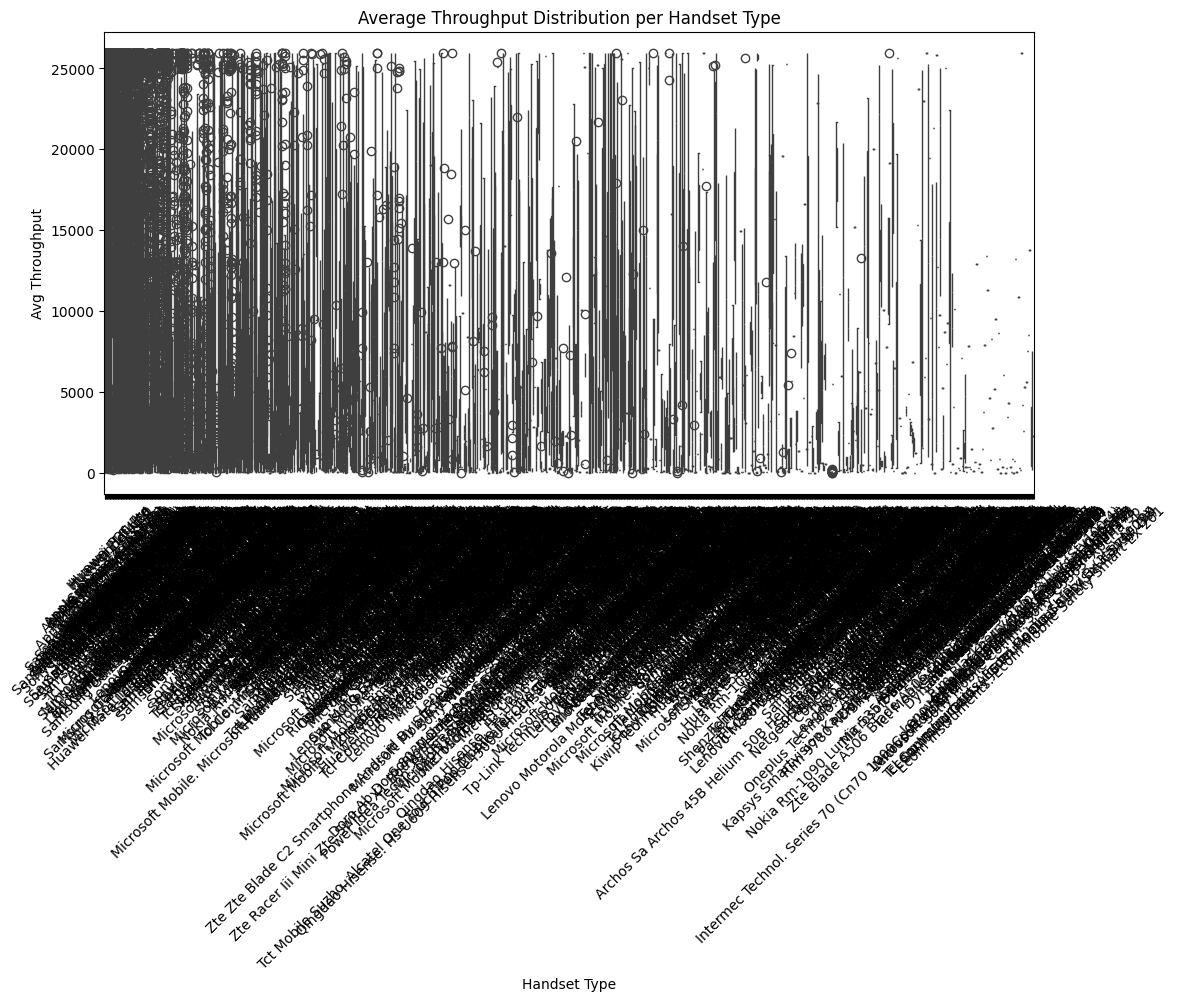

In [10]:
# Compute and report distributions
# a. Distribution of average throughput per handset type
plot_distribution(aggregated_data, 'Handset Type', 'Avg Throughput', 'Average Throughput Distribution per Handset Type')

### Interpretation
Interpretation of Average Throughput Distribution:
1. There appears to be variation in throughput across different handset types.
2. Some handset types have higher median throughput, suggesting better performance.
3. There are outliers in most handset types, indicating some users experience significantly higher throughput.

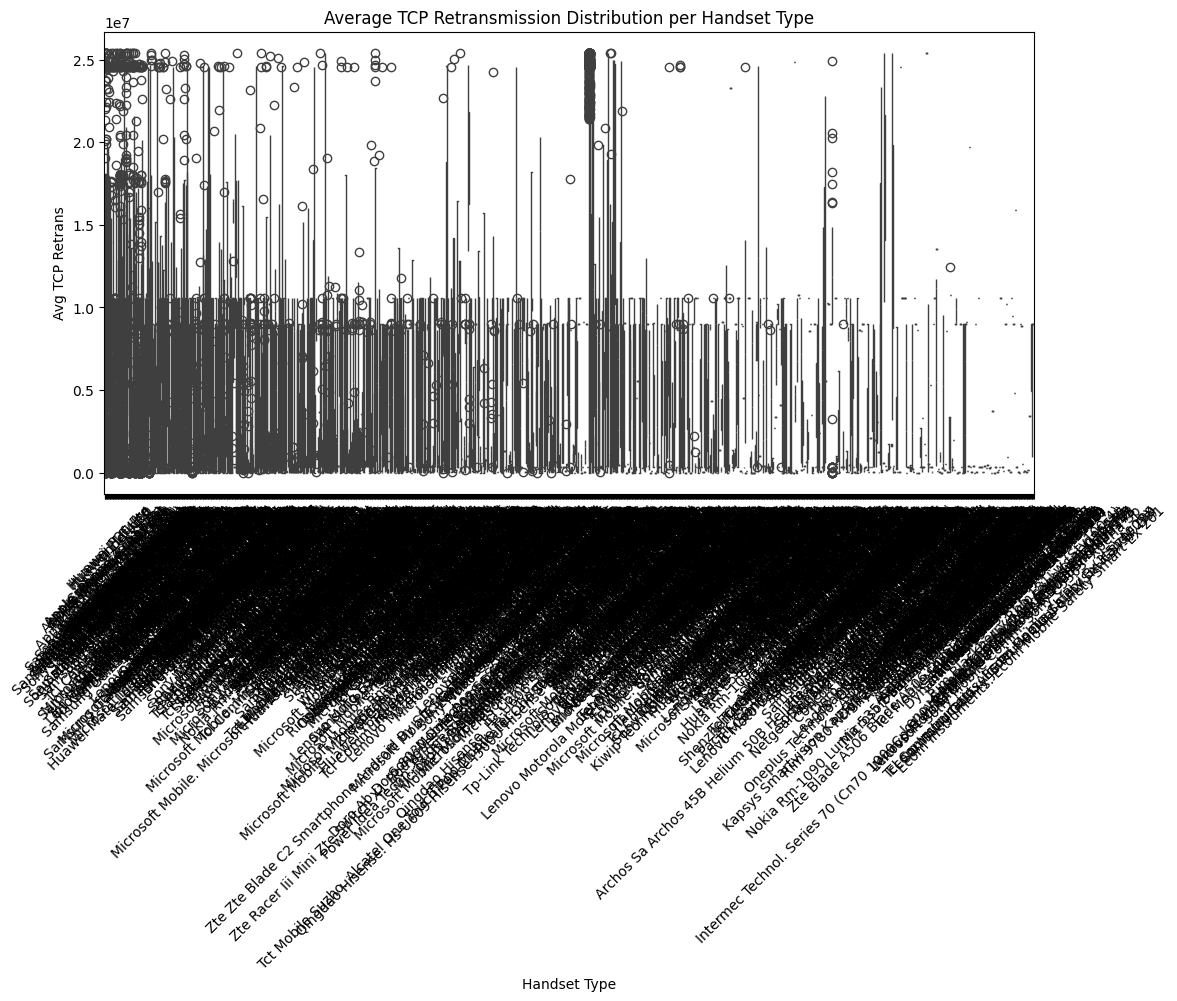

In [11]:
# b. Average TCP retransmission view per handset type
plot_distribution(aggregated_data, 'Handset Type', 'Avg TCP Retrans', 'Average TCP Retransmission Distribution per Handset Type')

### Interpretation
Interpretation of Average TCP Retransmission Distribution:
1. TCP retransmission rates vary across handset types, suggesting different levels of connection stability.
2. Some handset types show higher median retransmission rates, which could indicate potential issues.
3. There are outliers with very high retransmission rates across most handset types, which may represent users with poor network conditions.

### k-means clustering

In [12]:
# Task 3.4: Perform k-means clustering
clustered_data, cluster_centers = perform_kmeans_clustering(aggregated_data)

In [13]:
# Describe clusters
features = ['Avg TCP Retrans', 'Avg RTT', 'Avg Throughput']
cluster_descriptions = describe_clusters(clustered_data, cluster_centers, features)

print("\nCluster Descriptions:")
for desc in cluster_descriptions:
    print(desc)


Cluster Descriptions:
Cluster 0 (26385 customers):
  - Avg TCP Retrans: -1.07 (Avg: 2229947.97)
  - Avg RTT: -0.19 (Avg: 37.37)
  - Avg Throughput: 1.11 (Avg: 13866.48)

Cluster 1 (26295 customers):
  - Avg TCP Retrans: 0.25 (Avg: 8550094.58)
  - Avg RTT: 1.20 (Avg: 76.29)
  - Avg Throughput: -0.37 (Avg: 2190.91)

Cluster 2 (37358 customers):
  - Avg TCP Retrans: 0.58 (Avg: 10163930.30)
  - Avg RTT: -0.71 (Avg: 22.78)
  - Avg Throughput: -0.52 (Avg: 1060.79)



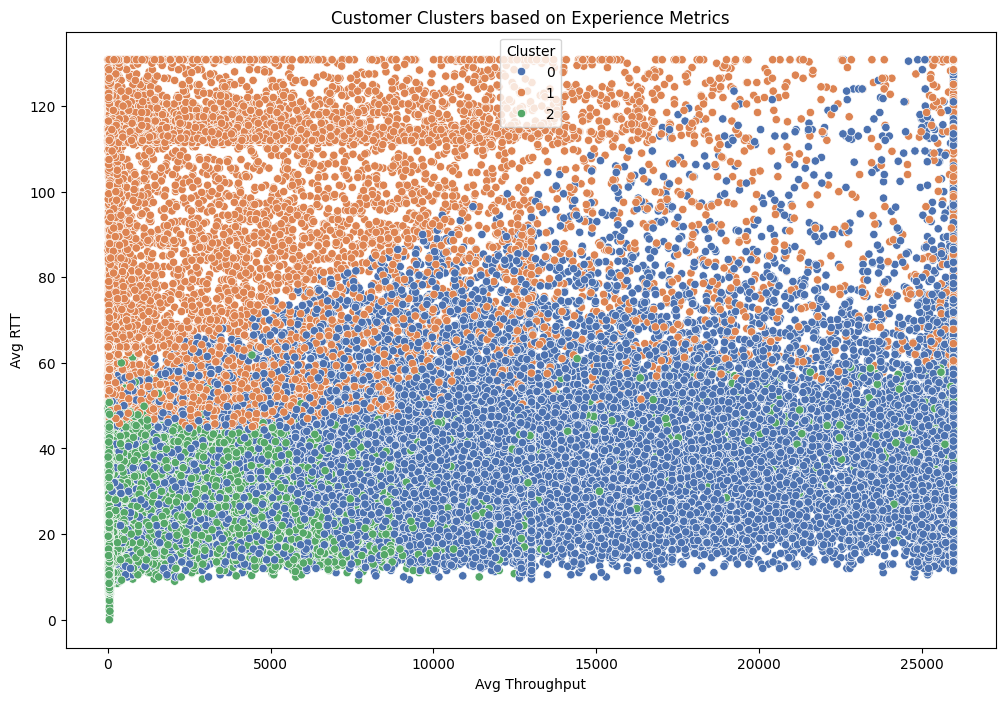

In [14]:
# Visualize clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=clustered_data, x='Avg Throughput', y='Avg RTT', hue='Cluster', palette='deep')
plt.title('Customer Clusters based on Experience Metrics')
plt.show()

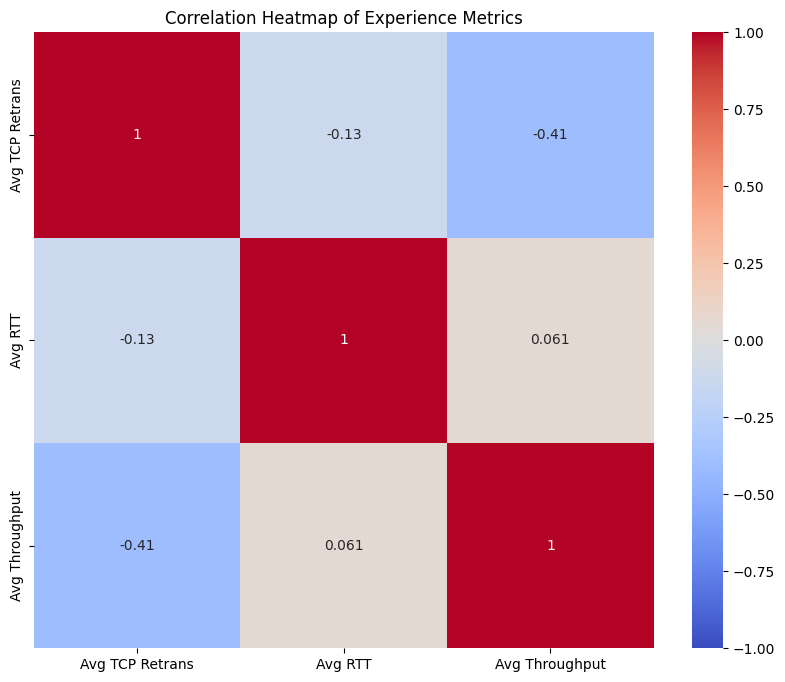

In [15]:
# 1. Correlation heatmap of experience metrics to understand relationships between different metrics.
correlation_matrix = clustered_data[features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Experience Metrics')
plt.show()

Interpretation of Correlation Heatmap:
1. [interpretation here]
2. [interpretation here]
3. [interpretation here]

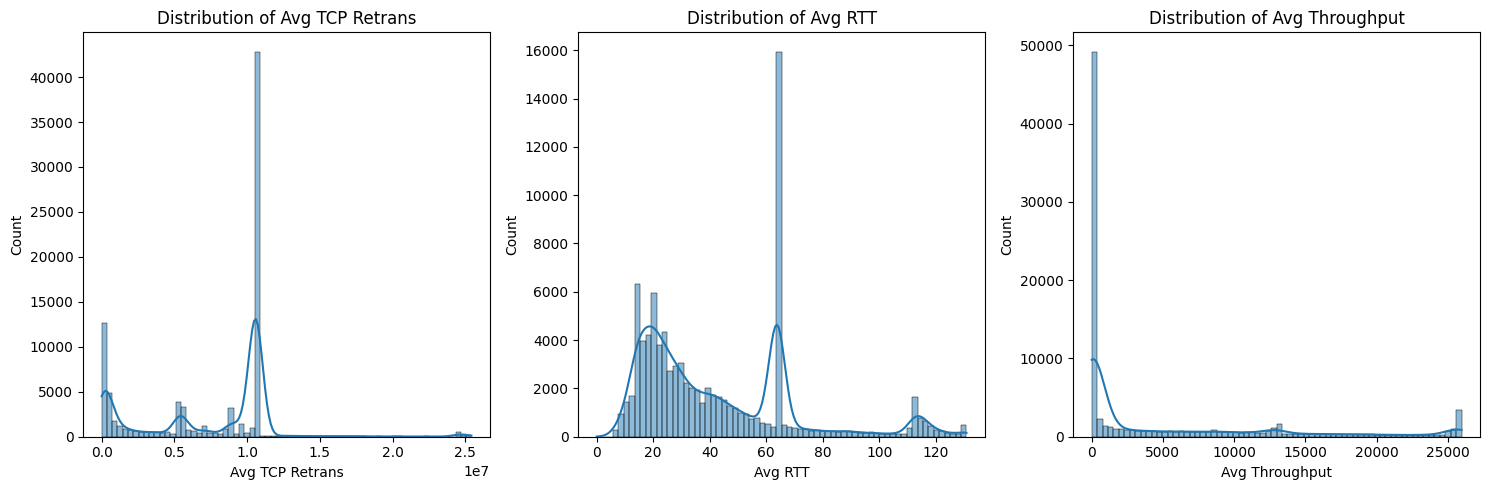

In [16]:
# 2. Distribution of experience metrics to understand their overall patterns.
plt.figure(figsize=(15, 5))
for i, feature in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.histplot(clustered_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

Interpretation of Experience Metrics Distributions:
1. [interpretation here]
2. [interpretation here]
3. [interpretation here]

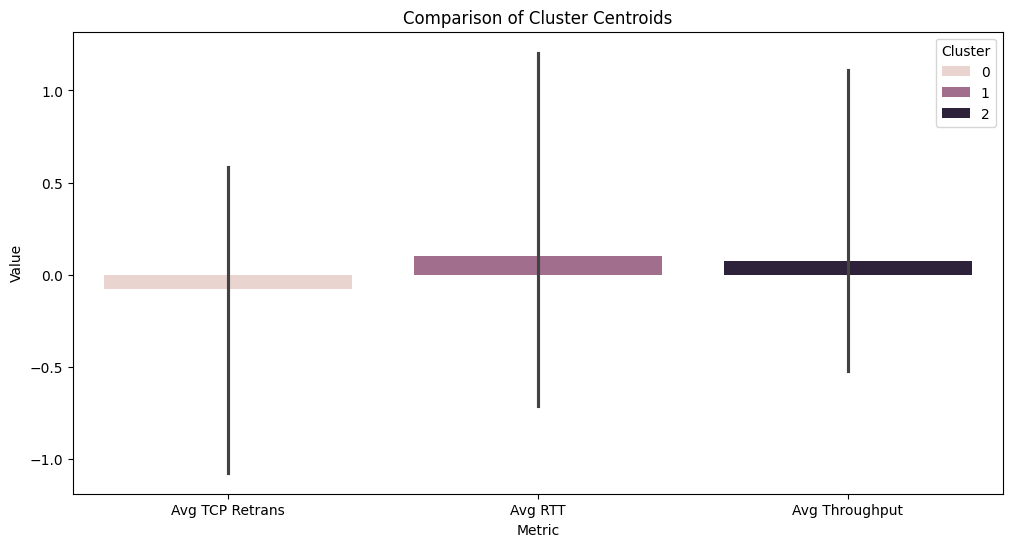

In [17]:
# 3. Cluster centroids comparison to better understand the characteristics of each cluster.
centroid_df = pd.DataFrame(cluster_centers, columns=features)
centroid_df = centroid_df.melt(var_name='Metric', value_name='Value')
centroid_df['Cluster'] = np.repeat(range(3), 3)

plt.figure(figsize=(12, 6))
sns.barplot(x='Metric', y='Value', hue='Cluster', data=centroid_df)
plt.title('Comparison of Cluster Centroids')
plt.show()

Interpretation of Cluster Centroids Comparison:
1. [interpretation here]
2. [interpretation here]
3. [interpretation here]

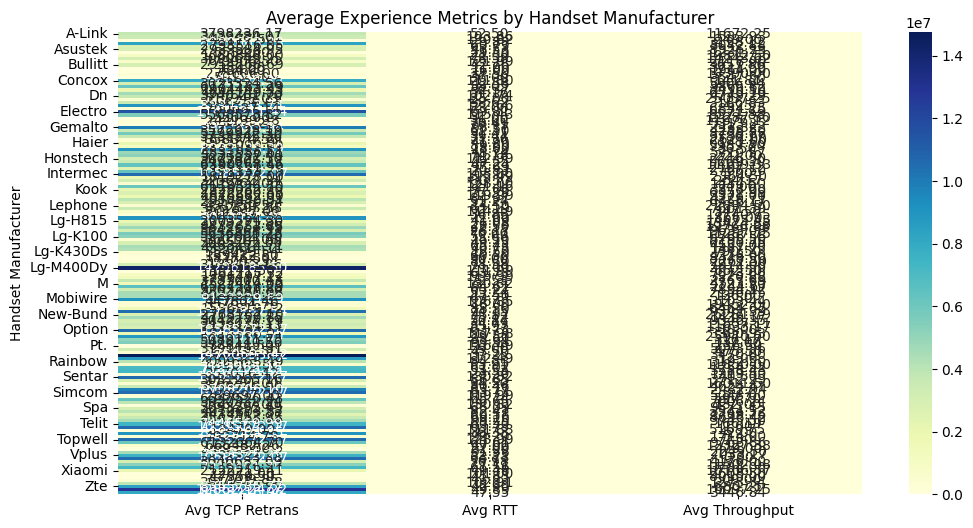

In [18]:
# 4. Experience metrics by handset manufacturer to identify any manufacturer-specific patterns.
aggregated_data['Handset Manufacturer'] = aggregated_data['Handset Type'].apply(lambda x: x.split()[0])
manufacturer_metrics = aggregated_data.groupby('Handset Manufacturer')[features].mean()

plt.figure(figsize=(12, 6))
sns.heatmap(manufacturer_metrics, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Average Experience Metrics by Handset Manufacturer')
plt.show()

Interpretation of Experience Metrics by Handset Manufacturer:
1. [interpretation here]
2. [interpretation here]
3. [interpretation here]

### Final insights and recommendations
Final Insights and Recommendations:
1. [ insight/recommendation here]
2. [ insight/recommendation here]
3. [ insight/recommendation here]
4. [ insight/recommendation here]
5. [ insight/recommendation here]